In [126]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from utils import get_file_data, get_config, get_file_avg

In [127]:
file_path = '../output/cmp123_delta_crit05/'
files = sorted(os.listdir(file_path))

cfg = get_config('../cfg/cmp123_delta_cfg.json')

deltas_list = cfg['deltas']

only_ls = [0.0] * len(deltas_list)
ds = [0.0] * len(deltas_list)
ours = [0.0] * len(deltas_list)

In [128]:
for file in files :
    if not file.endswith('.txt') :
        continue
    _params = [p.split('=') for p in file[:-4].split('&')]
    params = {k: v for k, v in _params}
    core_ls, core_ds, core_ours = get_file_avg(file_path + file)
    index = deltas_list.index(float(params['delta']))

    only_ls[index] += core_ls
    ds[index] += core_ds
    ours[index] += core_ours

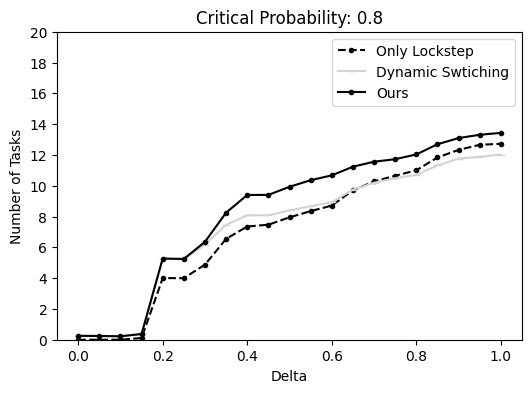

In [129]:
plt.figure(figsize=(6,4))

ax = plt.gca() 

plt.plot(deltas_list, only_ls, label='Only Lockstep', color='black', linestyle='dashed', marker='.')
plt.plot(deltas_list, ds, label='Dynamic Swtiching', color='lightgray', marker='_')
plt.plot(deltas_list, ours, label='Ours', color='black', marker='.')

plt.title('Critical Probability: ' + params['critical_prob'])
plt.xlabel('Delta')
plt.ylabel('Number of Tasks')
plt.ylim(0, 20)
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.legend()
plt.show()